# 模型正则化的问题描述

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ("Poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", lin_reg) #  为了查看coef，这里做了修改，用一个全局的“静态”对象。
    ])
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [2]:
# degree = 100
poly100_reg = PolynomialRegression(100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
print(f"Poly10: MSE: {mean_squared_error(y_test, y100_predict)}")

Poly10: MSE: 71011787461.53899


MSE: 17752946865.83694


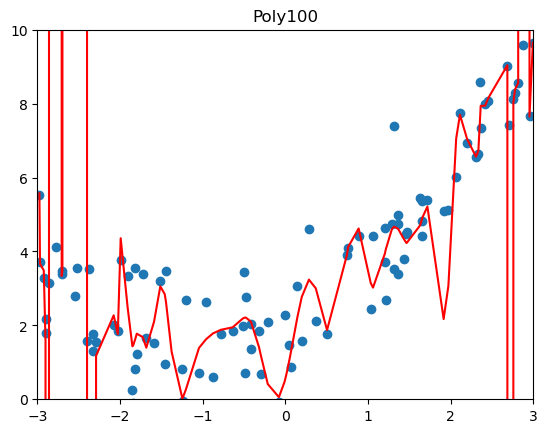

In [3]:
y100_predict = poly100_reg.predict(X)
print(f"MSE: {mean_squared_error(y, y100_predict)}")
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color="r") # 注意这里不是真正的拟合后的曲线，只是x和x对应的预测值
plt.title("Poly100")
plt.axis([-3, 3, 0, 10])
plt.scatter(x, y)
plt.show()

In [6]:
lin_reg.coef_[: 10]

array([-7.04038064e+11,  1.64185489e+01,  8.25979774e+01, -9.37841593e+02,
       -2.42113975e+03,  1.90197501e+04, -1.05871751e+05, -5.35006753e+04,
        7.55575064e+06, -2.97516530e+06])

可以观察到，这里的数值都很大，e+11，e+12等。这就是过拟合的效果。  
过拟合的数学上的表示就是线性方程里的项的前面的系数都非常大。  